In [1]:
from google.cloud import bigquery

PROJECT_ID="my-673-project"
DATASET_ID="NFLverse_dataset"
TABLE_ID="play_by_play_*" # match all years in play-by-play data

bq_client = bigquery.Client(project=PROJECT_ID)

table_ref = f"{PROJECT_ID}.{DATASET_ID}.{TABLE_ID}"

In [2]:
query = f"""
SELECT
  SAFE_CAST(CAST(play_id AS STRING) AS FLOAT64)                    AS play_id,
  game_id,
  home_team,
  away_team,
  season_type,
  SAFE_CAST(CAST(week AS STRING) AS INT64)                         AS week,
  posteam,
  posteam_type,
  defteam,
  SAFE_CAST(CAST(yardline_100 AS STRING) AS FLOAT64)               AS yardline_100,
  side_of_field,
  SAFE_CAST(CAST(game_seconds_remaining AS STRING) AS FLOAT64)     AS game_seconds_remaining,
  game_half,
  SAFE_CAST(CAST(drive AS STRING) AS FLOAT64)                      AS drive,
  SAFE_CAST(CAST(down AS STRING) AS FLOAT64)                       AS down,
  SAFE_CAST(CAST(goal_to_go AS STRING) AS INT64)                   AS goal_to_go,
  SAFE_CAST(CAST(ydstogo AS STRING) AS FLOAT64)                    AS ydstogo,
  play_type,
  SAFE_CAST(CAST(yards_gained AS STRING) AS FLOAT64)               AS yards_gained,
  td_team,
  SAFE_CAST(CAST(posteam_timeouts_remaining AS STRING) AS FLOAT64) AS posteam_timeouts_remaining,
  SAFE_CAST(CAST(defteam_timeouts_remaining AS STRING) AS FLOAT64) AS defteam_timeouts_remaining,
  SAFE_CAST(CAST(posteam_score AS STRING) AS FLOAT64)              AS posteam_score,
  SAFE_CAST(CAST(defteam_score AS STRING) AS FLOAT64)              AS defteam_score,
  SAFE_CAST(CAST(score_differential AS STRING) AS FLOAT64)         AS score_differential,
  SAFE_CAST(CAST(posteam_score_post AS STRING) AS FLOAT64)         AS posteam_score_post,
  SAFE_CAST(CAST(defteam_score_post AS STRING) AS FLOAT64)         AS defteam_score_post,
  SAFE_CAST(CAST(score_differential_post AS STRING) AS FLOAT64)    AS score_differential_post,
  SAFE_CAST(CAST(ep AS STRING) AS FLOAT64)                         AS ep,
  SAFE_CAST(CAST(epa AS STRING) AS FLOAT64)                        AS epa,
  SAFE_CAST(CAST(wp AS STRING) AS FLOAT64)                         AS wp,
  SAFE_CAST(CAST(wpa AS STRING) AS FLOAT64)                        AS wpa,
  SAFE_CAST(CAST(touchdown AS STRING) AS FLOAT64)                  AS touchdown,
  SAFE_CAST(CAST(season AS STRING) AS INT64)                       AS season,
  SAFE_CAST(CAST(cp AS STRING) AS FLOAT64)                         AS cp,
  SAFE_CAST(CAST(series AS STRING) AS FLOAT64)                     AS series,
  SAFE_CAST(CAST(series_success AS STRING) AS FLOAT64)             AS series_success,
  series_result,
  start_time,
  SAFE_CAST(CAST(play_clock AS STRING) AS FLOAT64)                 AS play_clock,
  SAFE_CAST(CAST(drive_play_count AS STRING) AS FLOAT64)           AS drive_play_count,
  drive_time_of_possession,
  SAFE_CAST(CAST(drive_first_downs AS STRING) AS FLOAT64)          AS drive_first_downs,
  SAFE_CAST(CAST(drive_yards_penalized AS STRING) AS FLOAT64)      AS drive_yards_penalized,
  SAFE_CAST(CAST(away_score AS STRING) AS INT64)                   AS away_score,
  SAFE_CAST(CAST(home_score AS STRING) AS INT64)                   AS home_score,
  SAFE_CAST(CAST(result AS STRING) AS INT64)                       AS result,
  SAFE_CAST(CAST(div_game AS STRING) AS INT64)                     AS div_game,
  roof,
  surface,
  SAFE_CAST(CAST(temp AS STRING) AS INT64)                         AS temp,
  SAFE_CAST(CAST(wind AS STRING) AS INT64)                         AS wind,
  SAFE_CAST(CAST(success AS STRING) AS FLOAT64)                    AS success,
  SAFE_CAST(CAST(home_opening_kickoff AS STRING) AS FLOAT64)       AS home_opening_kickoff
FROM `{table_ref}`;
"""

In [3]:
df = bq_client.query(query).to_dataframe()

In [4]:
df.shape

(1279095, 54)

In [5]:
df.head()

,play_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,yardline_100,...,away_score,home_score,result,div_game,roof,surface,temp,wind,success,home_opening_kickoff
0,1929.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,87.0,...,16,21,5,1,outdoors,grass,80,3,0.0,0.0
1,2274.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,85.0,...,16,21,5,1,outdoors,grass,80,3,0.0,0.0
2,2101.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,82.0,...,16,21,5,1,outdoors,grass,80,3,0.0,0.0
3,3140.0,2000_01_BAL_PIT,PIT,BAL,REG,1,PIT,home,BAL,2.0,...,16,0,-16,1,outdoors,astroturf,74,8,0.0,1.0
4,2500.0,2000_01_BAL_PIT,PIT,BAL,REG,1,PIT,home,BAL,80.0,...,16,0,-16,1,outdoors,astroturf,74,8,0.0,1.0


In [6]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'season_type', 'week',
       'posteam', 'posteam_type', 'defteam', 'yardline_100', 'side_of_field',
       'game_seconds_remaining', 'game_half', 'drive', 'down', 'goal_to_go',
       'ydstogo', 'play_type', 'yards_gained', 'td_team',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'posteam_score', 'defteam_score', 'score_differential',
       'posteam_score_post', 'defteam_score_post', 'score_differential_post',
       'ep', 'epa', 'wp', 'wpa', 'touchdown', 'season', 'cp', 'series',
       'series_success', 'series_result', 'start_time', 'play_clock',
       'drive_play_count', 'drive_time_of_possession', 'drive_first_downs',
       'drive_yards_penalized', 'away_score', 'home_score', 'result',
       'div_game', 'roof', 'surface', 'temp', 'wind', 'success',
       'home_opening_kickoff'],
      dtype='object')

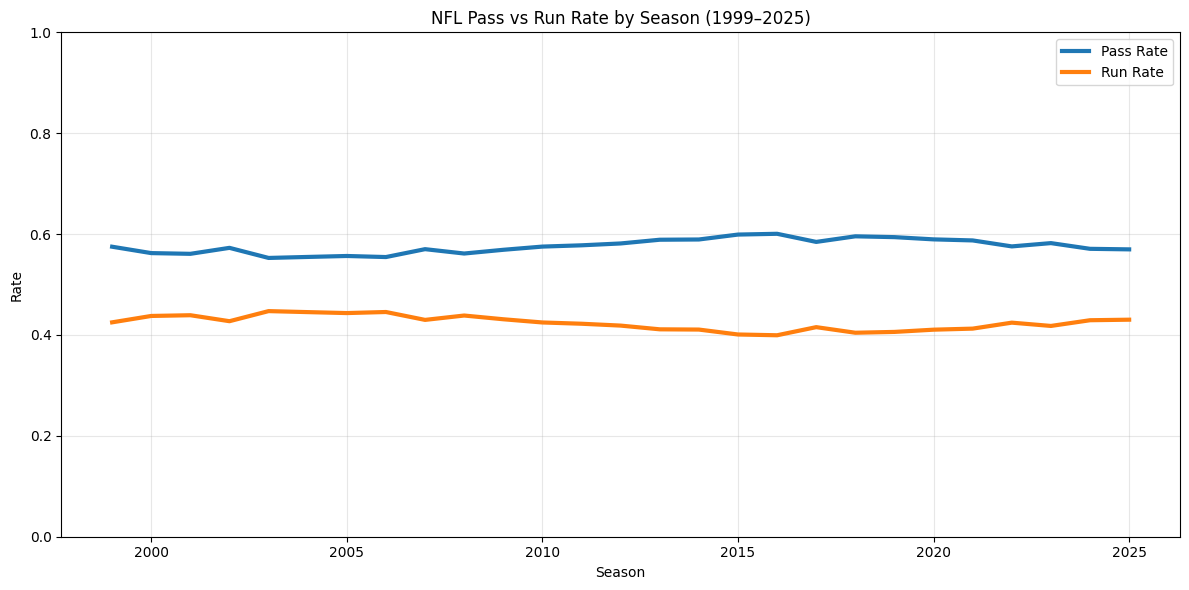

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# keep only plays that are actual runs or passes
plays = df[df['play_type'].isin(['run', 'pass'])].copy()

# compute pass/run counts per season
season_rates = (
    plays.groupby(['season', 'play_type'])
         .size()
         .unstack(fill_value=0)
)

season_rates['pass_rate'] = season_rates['pass'] / (season_rates['pass'] + season_rates['run'])
season_rates['run_rate']  = season_rates['run']  / (season_rates['pass'] + season_rates['run'])

plt.figure(figsize=(12,6))
plt.plot(season_rates.index, season_rates['pass_rate'], label='Pass Rate', linewidth=3)
plt.plot(season_rates.index, season_rates['run_rate'], label='Run Rate', linewidth=3)
plt.title('NFL Pass vs Run Rate by Season (1999–2025)')
plt.xlabel('Season')
plt.ylabel('Rate')
plt.ylim(0,1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

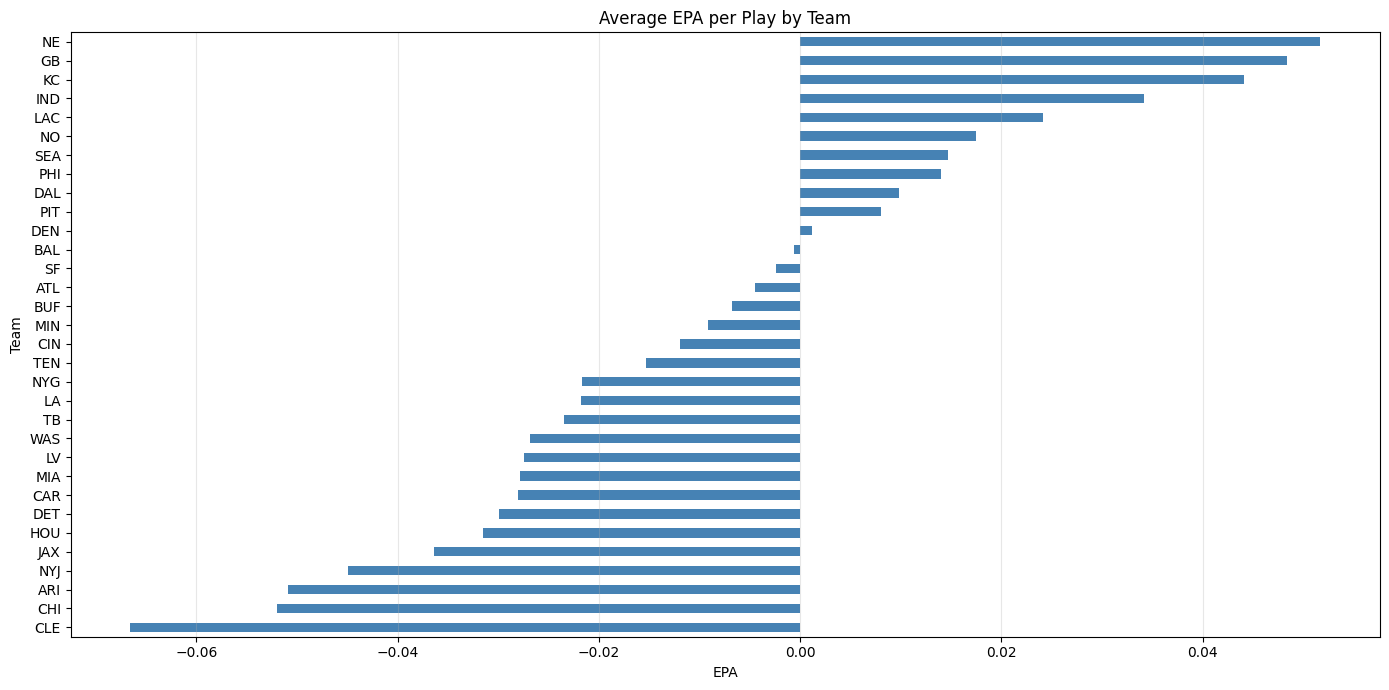

In [8]:
clean = df[df['posteam'].notna() & (df['posteam'].str.strip() != "")]

team_epa = (
    clean.groupby('posteam')['epa']
         .mean()
         .sort_values()
)

plt.figure(figsize=(14,7))
team_epa.plot(kind='barh', color='steelblue')
plt.title('Average EPA per Play by Team')
plt.xlabel('EPA')
plt.ylabel('Team')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

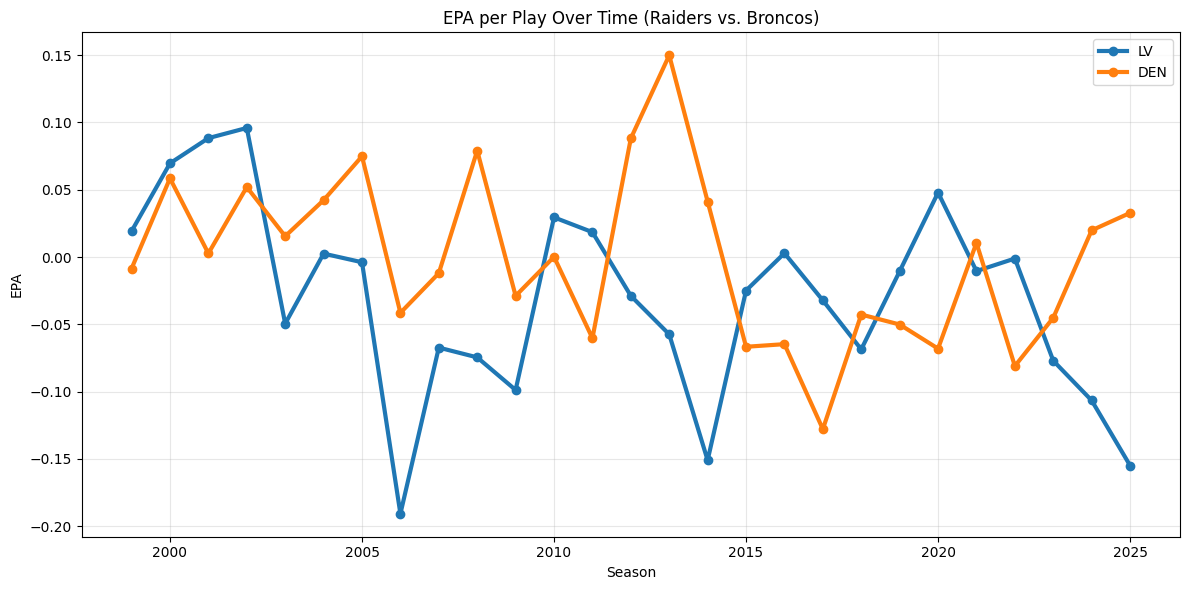

In [9]:
teams = ['LV', 'DEN']

subset = df[df['posteam'].isin(teams)]

team_season_epa = (
    subset.groupby(['season', 'posteam'])['epa']
          .mean()
          .reset_index()
)

plt.figure(figsize=(12,6))
for team in teams:
    temp = team_season_epa[team_season_epa['posteam'] == team]
    plt.plot(temp['season'], temp['epa'], marker='o', linewidth=3, label=team)
plt.title('EPA per Play Over Time (Raiders vs. Broncos)')
plt.xlabel('Season')
plt.ylabel('EPA')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# keep only running and passing plays
training_df = df[df['play_type'].isin(['run', 'pass'])].copy()

# only train on things that we knew before the play (to be fair)
X = training_df[['week', 'yardline_100', 'game_seconds_remaining', 'drive',
                 'down', 'goal_to_go', 'ydstogo', 'wp', 'div_game']]
y = training_df['play_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
dt_accuracy =  accuracy_score(y_test, dt_pred)
print(f"Accuracy: {dt_accuracy:.2f}")

Accuracy: 0.62


In [13]:
from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

In [14]:
# rf_accuracy = accuracy_score(y_test, rf_pred)
# print(f"Accuracy: {rf_accuracy:.2f}")
# rf_feature_importances = rf_model.feature_importances_
# print(f"Feature Importances: {rf_feature_importances}")
# pd.Series(rf_feature_importances, index=X.columns).nlargest(20).plot(kind='barh')

Accuracy: 0.68
Feature Importances: [0.11803113 0.15290972 0.24537625 0.08069452 0.0588653  0.00240471
 0.08116994 0.24145459 0.01909384]
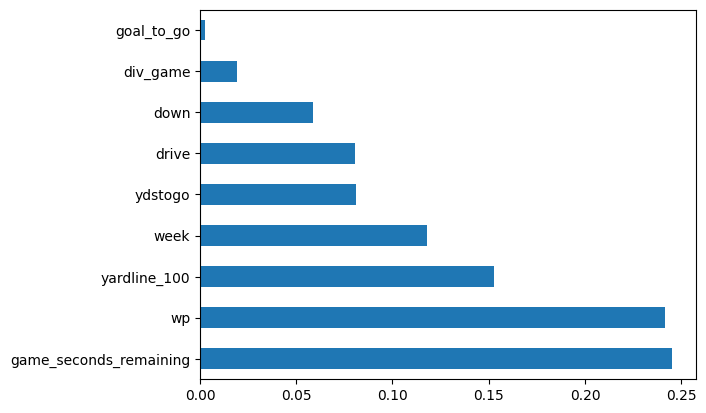

In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# encoded = le.fit_transform(y_train)
# xgb_model = XGBClassifier(objective = 'binary:logistic',
#                           eval_metric = 'logloss')
# xgb_model.fit(X_train, encoded)
# xgb_pred = xgb_model.predict(X_test)

In [16]:
# xgb_accuracy = accuracy_score(le.inverse_transform(xgb_pred), y_test)
# print(f"Accuracy: {xgb_accuracy:.2f}")
# xgb_feature_importances = xgb_model.feature_importances_
# print(f"Feature Importances: {xgb_feature_importances}")
# pd.Series(xgb_feature_importances, index=X.columns).nlargest(20).plot(kind='barh')

Accuracy: 0.70
Feature Importances: [0.00902268 0.03441436 0.10970974 0.01161071 0.39676204 0.03117386
 0.27661473 0.12191729 0.00877456]
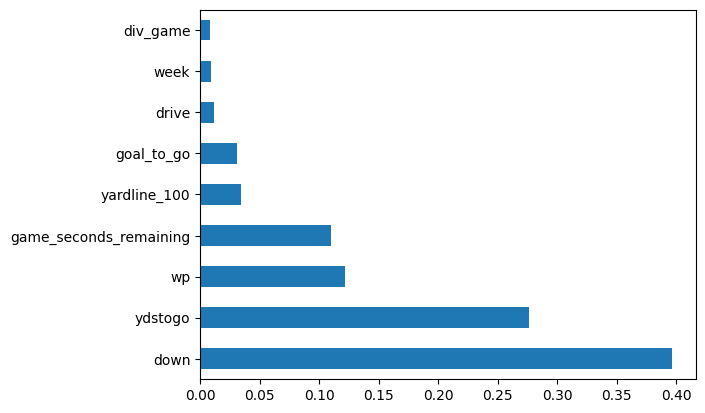

In [17]:
# new train-test split with more features included

# keep only running and passing plays
training_df = df[df['play_type'].isin(['run', 'pass'])].copy()

# only train on things that we knew before the play (to be fair)
X = training_df[['week', 'yardline_100', 'game_seconds_remaining', 'drive',
                 'down', 'goal_to_go', 'ydstogo', 'wp', 'div_game',
                 # these are new
                 'season_type', 'posteam_type', 'side_of_field', 'game_half',
                 'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
                 'posteam_score', 'defteam_score', 'score_differential', 'ep',
                 'cp', 'drive_play_count',
                 'drive_first_downs',
                 'drive_yards_penalized', 'roof', 'surface', 'temp', 'wind',
                 'home_opening_kickoff',
                 'play_clock', 'start_time', 'drive_time_of_possession'
                 ]]
                 # maybe remove last 3 due to overfitting

# convert all non-numeric to categorical type
non_numeric = X.select_dtypes(exclude=["number"]).columns
X[non_numeric] = X[non_numeric].astype("category")

y = training_df['play_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

/tmp/ipython-input-161213060.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[non_numeric] = X[non_numeric].astype("category")


In [18]:
# correlation matrix for feature selection
df_corr = X_train.copy()
for col in df_corr.select_dtypes(include="category").columns:
  df_corr[col] = df_corr[col].cat.codes
clean_df_corr = df_corr.loc[:, df_corr.nunique() > 1]
corr = clean_df_corr.corr().abs()

from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

distance = 1 - corr
Z = linkage(distance, method="average")
cluster_labels = fcluster(Z, t=0.7, criterion="distance")
clusters = {}
for feature, cluster_id in zip(corr.columns, cluster_labels):
    clusters.setdefault(cluster_id, []).append(feature)
clusters

/tmp/ipython-input-1688352842.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method="average")


{np.int32(10): ['week', 'temp'],
 np.int32(6): ['yardline_100', 'ep'],
 np.int32(2): ['game_seconds_remaining', 'drive', 'game_half'],
 np.int32(13): ['down'],
 np.int32(7): ['goal_to_go'],
 np.int32(14): ['ydstogo'],
 np.int32(1): ['wp', 'score_differential'],
 np.int32(22): ['div_game'],
 np.int32(11): ['season_type'],
 np.int32(23): ['posteam_type'],
 np.int32(19): ['side_of_field'],
 np.int32(8): ['posteam_timeouts_remaining'],
 np.int32(9): ['defteam_timeouts_remaining'],
 np.int32(3): ['posteam_score'],
 np.int32(4): ['defteam_score'],
 np.int32(15): ['cp'],
 np.int32(5): ['drive_play_count',
  'drive_first_downs',
  'drive_time_of_possession'],
 np.int32(16): ['drive_yards_penalized'],
 np.int32(20): ['roof'],
 np.int32(17): ['surface'],
 np.int32(18): ['wind'],
 np.int32(21): ['home_opening_kickoff'],
 np.int32(12): ['start_time']}

In [19]:
# features to keep: 'week', 'yardline_100', 'game_seconds_remaining', 'down',
# 'goal_to_go', 'ydstogo', 'score_differential', 'div_game', 'season_type',
# 'posteam_type', 'side_of_field', 'posteam_timeouts_remaining',
# 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'cp',
# 'drive_play_count', 'drive_yards_penalized', 'roof', 'surface', 'wind',
# 'home_opening_kickoff', 'start_time'

X_reduced = X_train[['week', 'yardline_100', 'game_seconds_remaining', 'down',
                     'goal_to_go', 'ydstogo', 'score_differential', 'div_game',
                     'season_type', 'posteam_type', 'side_of_field',
                     'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
                     'posteam_score', 'defteam_score', 'drive_play_count',
                     'drive_yards_penalized', 'roof', 'surface', 'wind',
                     'home_opening_kickoff', 'start_time']]
                     # removed cp since it overfit

# from sklearn_genetic import GAFeatureSelectionCV
# from sklearn_genetic.space import Continuous, Integer, Categorical
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold

# xgb_new = XGBClassifier(
#     tree_method="hist",
#     enable_categorical=True,
#     eval_metric="logloss"
# )

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ga_selector = GAFeatureSelectionCV(
#     estimator=xgb_new,
#     cv=cv,
#     scoring="accuracy",
#     population_size=30,       # number of subsets per generation
#     generations=20,           # how long to evolve
#     n_jobs=-1,
#     verbose=True,
#     keep_top_k=5,             # elitism: keep best 5 subsets each generation
#     crossover_probability=0.8,
#     mutation_probability=0.1
# )

# # handle categorical types
# X_ga = X_reduced.copy()
# for col in X_ga.select_dtypes(include="category").columns:
#     X_ga[col] = X_ga[col].cat.codes
# X_ga = X_ga.fillna(-999) # handle NAs

# ga_selector.fit(X_ga, encoded)

# best_features_mask = ga_selector.best_features_
# best_features = X_reduced.columns[best_features_mask]

# print("Best features found by GA:")
# print(list(best_features))

# best_features = ['yardline_100', 'game_seconds_remaining', 'down', 'ydstogo',
#                  'score_differential', 'side_of_field',
#                  'defteam_timeouts_remaining', 'posteam_score', 'defteam_score',
#                  'drive_play_count', 'roof', 'wind', 'home_opening_kickoff']

In [20]:
# Best params: {'subsample': 1.0, 'reg_lambda': 20, 'reg_alpha': 0.1,
# 'n_estimators': 400, 'min_child_weight': 10, 'max_depth': 2,
# 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}

# for iterating over hyperparameters
# param_dist = {
#     "max_depth": [2, 3, 4, 5, 6, 8],
#     "min_child_weight": [1, 2, 3, 5, 7, 10],
#     "gamma": [0, 0.1, 0.2, 0.3, 0.5],
#     "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 1.0],
#     "reg_alpha": [0, 0.01, 0.1, 1, 5],
#     "reg_lambda": [0.1, 1, 5, 10, 20],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "n_estimators": [200, 400, 600]
# }

# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# search = RandomizedSearchCV(
#     estimator=xgb_new,
#     param_distributions=param_dist,
#     n_iter=50,
#     scoring="accuracy",
#     cv=cv,
#     verbose=1,
#     n_jobs=1,
#     random_state=42
# )

# search.fit(X_train, encoded) # using LabelEncoder from before

# best_xgb = search.best_estimator_
# print("Best params:", search.best_params_)

# best_xgb.fit(X_train, encoded)

# xgb_new.fit(X_train[best_features], encoded)

In [21]:
# xgb_new_pred = xgb_new.predict(X_test[best_features])
# xgb_new_acc = accuracy_score(le.inverse_transform(xgb_new_pred), y_test)
# print(f"Accuracy: {xgb_new_acc:.2f}")
# xgb_new_fi = xgb_new.feature_importances_
# print(f"Feature Importances: {xgb_new_fi}")
# pd.Series(xgb_new_fi, index=best_features).nlargest(20).plot(kind='barh')

Accuracy: 0.70
Feature Importances: [0.03066679 0.09508156 0.33248332 0.2677826  0.1106563  0.01471539
 0.05292065 0.01624648 0.0319239  0.02540824 0.00697812 0.00846745
 0.0066692 ]
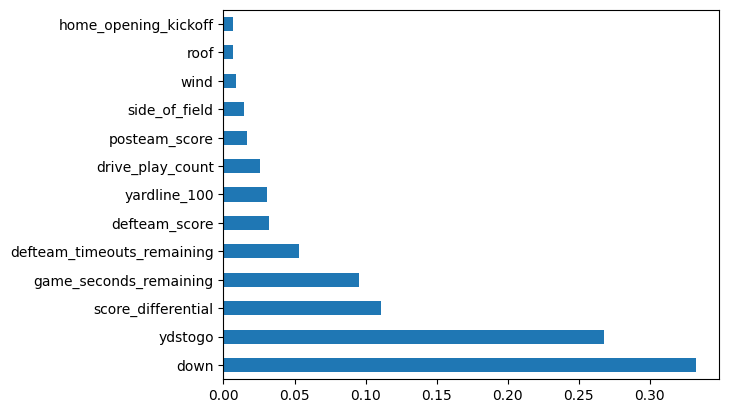

In [22]:
PROJECT_ID="my-673-project"
DATASET_ID="NFLverse_dataset"
TABLE_ID="NFL_scraped_PFR"

bq_client = bigquery.Client(project=PROJECT_ID)

table_ref = f"{PROJECT_ID}.{DATASET_ID}.{TABLE_ID}"

In [23]:
query = f"""
SELECT
  team,
  year,
  record,
  coaches
FROM `{table_ref}`;
"""

In [24]:
seasons = bq_client.query(query).to_dataframe()

In [25]:
seasons.shape

(861, 4)

In [26]:
seasons.head()

,team,year,record,coaches
0,crd,1999,6-10-0,['Vince Tobin']
1,crd,2000,3-13-0,"['Dave McGinnis', 'Vince Tobin']"
2,crd,2001,7-9-0,['Dave McGinnis']
3,crd,2002,5-11-0,['Dave McGinnis']
4,crd,2003,4-12-0,['Dave McGinnis']


In [27]:
# align team names with those from the larger dataset
seasons['team'] = seasons['team'].str.upper()
seasons['team'] = seasons['team'].replace('CRD', 'ARI')
seasons['team'] = seasons['team'].replace('SFO', 'SF')
seasons['team'] = seasons['team'].replace('RAM', 'LA')
seasons['team'] = seasons['team'].replace('GNB', 'GB')
seasons['team'] = seasons['team'].replace('NOR', 'NO')
seasons['team'] = seasons['team'].replace('TAM', 'TB')
seasons['team'] = seasons['team'].replace('KAN', 'KC')
seasons['team'] = seasons['team'].replace('SDG', 'LAC')
seasons['team'] = seasons['team'].replace('RAI', 'LV')
seasons['team'] = seasons['team'].replace('RAV', 'BAL')
seasons['team'] = seasons['team'].replace('NWE', 'NE')
seasons['team'] = seasons['team'].replace('CLT', 'IND')
seasons['team'] = seasons['team'].replace('OTI', 'TEN')
seasons['team'] = seasons['team'].replace('HTX', 'HOU')

In [28]:
# extract wins
seasons['wins'] = seasons['record'].str.split('-').str[0].astype(int)

In [29]:
clean = clean.merge(
    seasons[['team', 'year', 'wins', 'coaches']],
    left_on=['posteam', 'season'],
    right_on=['team', 'year'],
    how='left'
)
clean.head()

,play_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,yardline_100,...,roof,surface,temp,wind,success,home_opening_kickoff,team,year,wins,coaches
0,1929.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,87.0,...,outdoors,grass,80,3,0.0,0.0,NYG,2000,12,['Jim Fassel']
1,2274.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,85.0,...,outdoors,grass,80,3,0.0,0.0,NYG,2000,12,['Jim Fassel']
2,2101.0,2000_01_ARI_NYG,NYG,ARI,REG,1,NYG,home,ARI,82.0,...,outdoors,grass,80,3,0.0,0.0,NYG,2000,12,['Jim Fassel']
3,3140.0,2000_01_BAL_PIT,PIT,BAL,REG,1,PIT,home,BAL,2.0,...,outdoors,astroturf,74,8,0.0,1.0,PIT,2000,9,['Bill Cowher']
4,2500.0,2000_01_BAL_PIT,PIT,BAL,REG,1,PIT,home,BAL,80.0,...,outdoors,astroturf,74,8,0.0,1.0,PIT,2000,9,['Bill Cowher']


/tmp/ipython-input-968824049.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_single['coach'] = clean_single['coaches_list'].str[0]


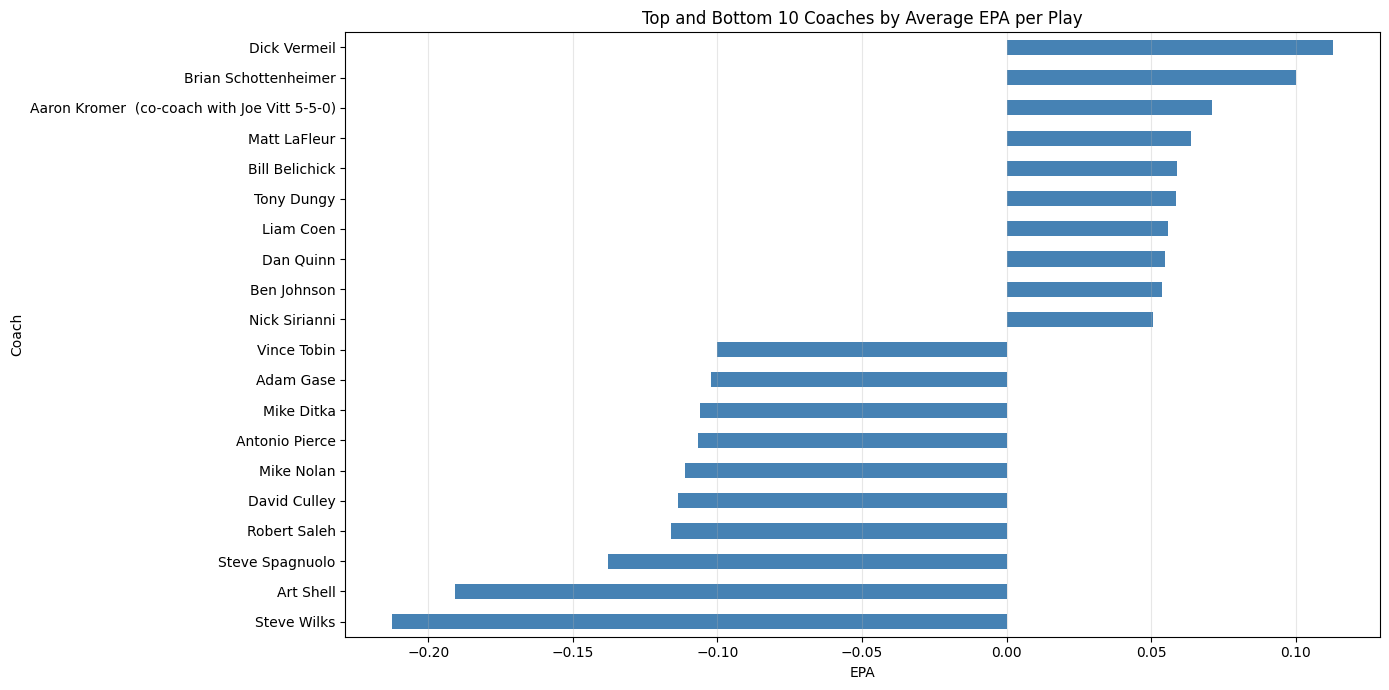

In [30]:
import ast
import re

def parse_coach_string(s):
    if not isinstance(s, str) or s.strip() == "":
        return []

    # Case 1: looks like a Python list → use ast.literal_eval
    if s.strip().startswith("[") and s.strip().endswith("]"):
        try:
            return ast.literal_eval(s)
        except:
            pass  # fall through to regex parsing

    # Case 2: split on "and" or commas
    parts = re.split(r",| and ", s)
    parts = [p.strip() for p in parts if p.strip()]
    return parts

clean['coaches_list'] = clean['coaches'].apply(parse_coach_string)
clean_single = clean[clean['coaches_list'].apply(lambda x: len(x) == 1)]
clean_single['coach'] = clean_single['coaches_list'].str[0]

coach_epa = (
    clean_single.groupby('coach')['epa']
         .mean()
         .sort_values()
)

top10_coach = coach_epa.tail(10)
bottom10_coach = coach_epa.head(10)
extreme_coaches = pd.concat([bottom10_coach, top10_coach])

plt.figure(figsize=(14,7))
extreme_coaches.plot(kind='barh', color='steelblue')
plt.title('Top and Bottom 10 Coaches by Average EPA per Play')
plt.xlabel('EPA')
plt.ylabel('Coach')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# predict the winner of the super bowl

# new train-test split with expected points as the target variable

# keep only running and passing plays
training_df = df[df['play_type'].isin(['run', 'pass'])].copy()

# only train on things that we knew before the play (to be fair)
X = training_df[['week', 'yardline_100', 'game_seconds_remaining', 'drive',
                 'down', 'goal_to_go', 'ydstogo', 'wp', 'div_game',
                 # these are new
                 'season_type', 'posteam_type', 'side_of_field', 'game_half',
                 'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
                 'posteam_score', 'defteam_score', 'score_differential', # 'ep',
                 'cp', 'drive_play_count',
                 'drive_first_downs',
                 'drive_yards_penalized', 'roof', 'surface', 'temp', 'wind',
                 'home_opening_kickoff',
                 'play_clock', 'start_time', 'drive_time_of_possession'
                 ]].copy() # Added .copy() to avoid SettingWithCopyWarning

# Convert non-numeric to categorical type first
non_numeric_cols_to_convert = X.select_dtypes(exclude=["number"]).columns
for col in non_numeric_cols_to_convert:
    X[col] = X[col].astype("category")

# Now convert all categorical columns to their numerical codes
for col in X.select_dtypes(include="category").columns:
    X[col] = X[col].cat.codes

y = training_df['ep']

# Handle potential NaNs
X = X.fillna(-1)
y = y.fillna(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_superbowl = RandomForestRegressor(n_estimators=200, random_state=42)
rf_superbowl.fit(X_train, y_train)
superbowl_pred = rf_superbowl.predict(X_test)

Feature Importances: [5.58362844e-04 8.35959647e-01 1.00073141e-02 5.87784184e-04
 7.03055693e-02 1.42247304e-02 2.51765235e-02 5.72366416e-04
 1.00796630e-04 2.00974704e-05 1.26683252e-02 6.52220262e-04
 6.27642105e-04 8.86723956e-03 6.19270862e-03 3.71604290e-04
 3.86998395e-04 3.33400768e-04 1.08378007e-03 4.29494082e-04
 2.80861968e-04 3.73337057e-04 9.05882459e-04 5.18394738e-04
 1.47915352e-03 8.89685892e-04 9.87718661e-05 2.95682029e-04
 2.12100904e-03 3.91061650e-03]


<Axes: >

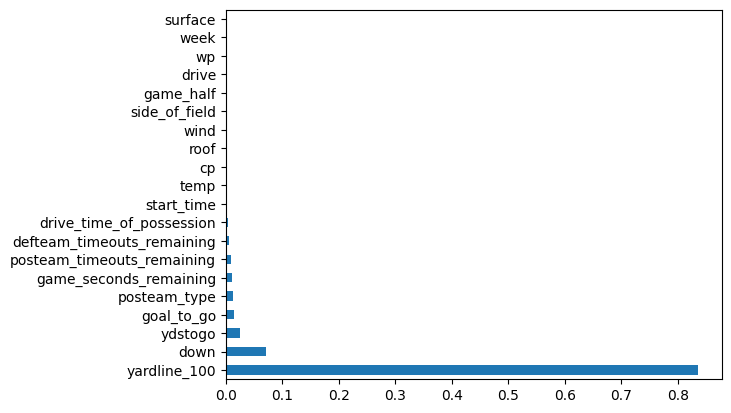

In [33]:
sb_feature_importances = rf_superbowl.feature_importances_
print(f"Feature Importances: {sb_feature_importances}")
pd.Series(sb_feature_importances, index=X.columns).nlargest(20).plot(kind='barh')

Feature Importances: [5.52510977e-04 8.35465060e-01 1.00594944e-02 5.92795718e-04
 7.08347449e-02 1.42690191e-02 2.50797068e-02 5.93581309e-04
 1.01226955e-04 2.04876709e-05 1.25993091e-02 6.54699094e-04
 6.12682419e-04 8.91147296e-03 6.24023670e-03 3.74525742e-04
 3.87637367e-04 3.36016640e-04 1.08460460e-03 4.21507129e-04
 2.78436284e-04 3.69313112e-04 8.93909323e-04 5.23905920e-04
 1.52200425e-03 8.66706921e-04 9.85782276e-05 2.92966559e-04
 2.13493742e-03 3.82792261e-03]
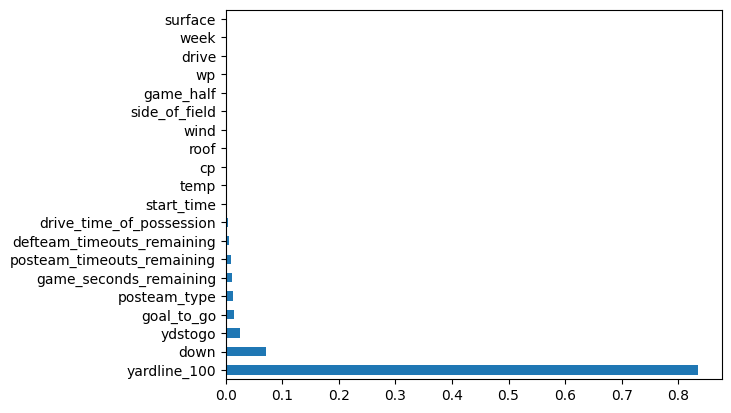

In [37]:
seahawks_2025 = training_df[(training_df['away_team'] == 'SEA') &
                            (training_df['season'] == 2025)]
patriots_2025 = training_df[(training_df['home_team'] == 'NE') &
                            (training_df['season'] == 2025)]
feature_cols = ['week', 'yardline_100', 'game_seconds_remaining', 'drive',
                 'down', 'goal_to_go', 'ydstogo', 'wp', 'div_game',
                 'season_type', 'posteam_type', 'side_of_field', 'game_half',
                 'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
                 'posteam_score', 'defteam_score', 'score_differential',
                 'cp', 'drive_play_count',
                 'drive_first_downs',
                 'drive_yards_penalized', 'roof', 'surface', 'temp', 'wind',
                 'home_opening_kickoff',
                 'play_clock', 'start_time', 'drive_time_of_possession'
                 ]

cat_cols = list(non_numeric_cols_to_convert)

for col in cat_cols:
    seahawks_2025[col] = seahawks_2025[col].astype("category").cat.codes
    patriots_2025[col] = patriots_2025[col].astype("category").cat.codes

seahawks_mean = seahawks_2025[feature_cols].mean()
seahawks_input = seahawks_mean.values.reshape(1, -1)
patriots_mean = patriots_2025[feature_cols].mean()
patriots_input = patriots_mean.values.reshape(1, -1)

seahawks_pred = rf_superbowl.predict(seahawks_input)[0]
patriots_pred = rf_superbowl.predict(patriots_input)[0]
print(seahawks_pred)
print(patriots_pred)

1.6576167176233139
2.2990473286117776


/tmp/ipython-input-2141473593.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seahawks_2025[col] = seahawks_2025[col].astype("category").cat.codes
/tmp/ipython-input-2141473593.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patriots_2025[col] = patriots_2025[col].astype("category").cat.codes
/tmp/ipython-input-2141473593.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the